## MODELAGEM DE DISPERSÃO

In [1]:
# Criando uma função do modelo gaussiano
import numpy as np
def modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H):
    termo1 = qs/(2*np.pi*sigmaY*sigmaZ*u)
    termo2 = np.exp((-y**2)/(2*sigmaY**2))
    termo3 = np.exp((-(z-H)**2)/(2*sigmaZ**2)) + np.exp((-(z+H)**2)/(2*sigmaZ**2))
    conc = termo1*termo2*termo3
    conc = conc*10**6
    return conc

In [2]:
# Criando função da estimativa da dispersão lateral e vertical da pluma
def sigmaXY(x,classe,urbOrRural):
    if urbOrRural=='urbano':
        if (classe=='A') or (classe=='B'):
            sigmaY = 0.32*x*(1+0.0004*x)**(-0.5)
            sigmaZ = 0.24*x*(1+0.001*x)**(0.5)
        else:
            print('Classe de estabilidade errada')
    if urbOrRural=='rural':
        if (classe=='A') :
            sigmaY = 0.22*x*(1+0.0001*x)**(-0.5)
            sigmaZ = 0.20*x
        else:
            print('Classe de estabilidade errada. Fique ligado')
    return sigmaY,sigmaZ


In [ ]:
# 

In [3]:
# Utilizando a função do modelo gaussiano
qs = 100 # g/s
sigmaY = 10 # m
sigmaZ = 15 # m
u = 10 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
H = 50 # m

# Chamando a função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H)

print("A concentração estimada é = " +str(conc) + ' [$\mu$]g/m³')

A concentração estimada é = 86.2052564132534 [$\mu$]g/m³


[[ -32.65986324  -25.94019573  -19.27694349 ... 1427.60384757
  1429.34461749 1431.0835056 ]
 [ -32.65986324  -25.94019573  -19.27694349 ... 1427.60384757
  1429.34461749 1431.0835056 ]
 [ -32.65986324  -25.94019573  -19.27694349 ... 1427.60384757
  1429.34461749 1431.0835056 ]
 ...
 [ -32.65986324  -25.94019573  -19.27694349 ... 1427.60384757
  1429.34461749 1431.0835056 ]
 [ -32.65986324  -25.94019573  -19.27694349 ... 1427.60384757
  1429.34461749 1431.0835056 ]
 [ -32.65986324  -25.94019573  -19.27694349 ... 1427.60384757
  1429.34461749 1431.0835056 ]]


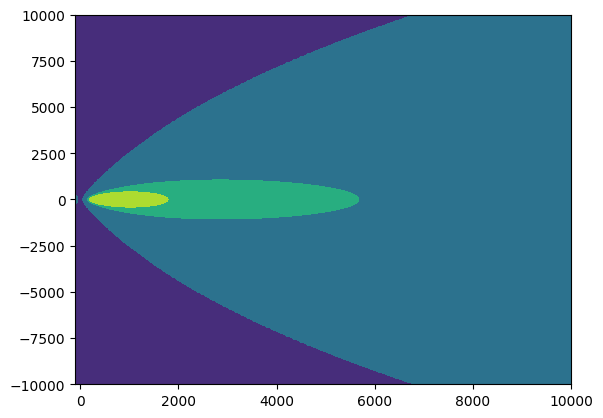

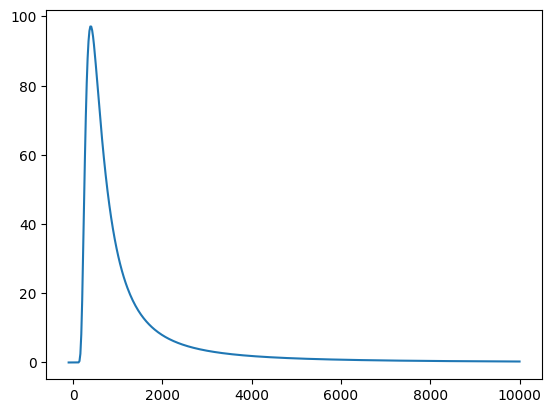

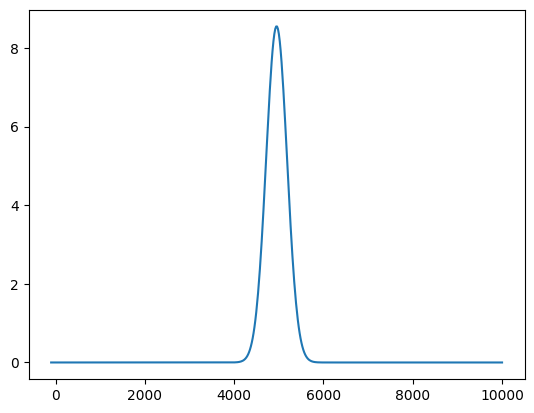

In [4]:
# Criando domínio de modelagem 
x = np.linspace(-100,10000,500)
#print(x)
y = np.linspace(-10000,10000,500)

# Criando matrizes de x e y
xx,yy = np.meshgrid(x,y)
#print(xx.shape)


# Adotando inputs
classe = 'B'
urbOrRural = 'urbano' 
H = 150 # m
# Estimando o coeficiente de dispersão lateral e vertical
sigmaY,sigmaZ = sigmaXY(xx,classe,urbOrRural)
print(sigmaY)

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,yy,z,H)

# Visualização dos resultados no espaço
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig,ax = plt.subplots()
ax.contourf(xx,yy,conc+0.1,norm = LogNorm())

# Corte em y - sobre o eixo x
fig,ax = plt.subplots()
ax.plot(x,conc[250,:])

# Corte em x - sobre o eixo y 
fig,ax = plt.subplots()
ax.plot(x,conc[:,100])

In [1]:
def elevaPlumaHolland(hg, d, vs, u):
    if vs > 1.5 * u:
        deltaH = 2 * d * ((vs / u) - 1.5)
    else:
        deltaH = 0  # No caso de a pluma não subir
    return hg + deltaH

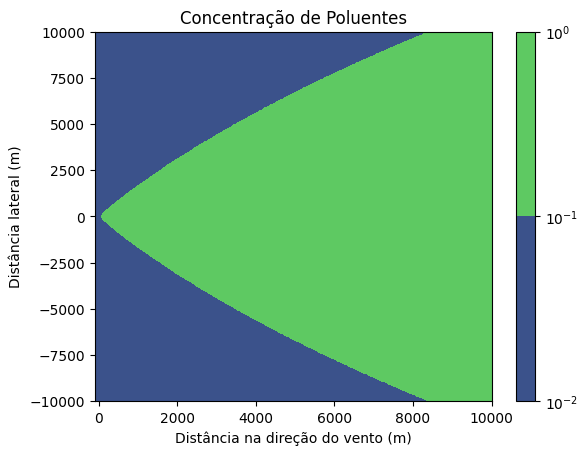

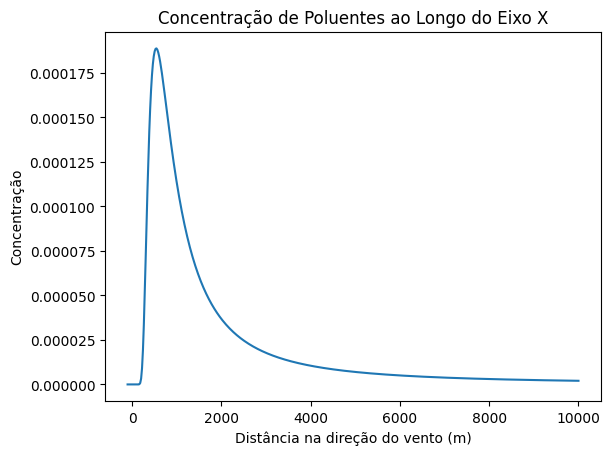

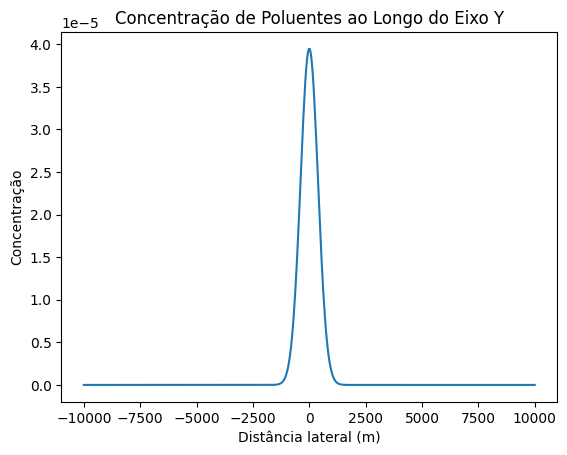

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Funções auxiliares
def sigmaXY(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.12 * x
        else:
            sigmaY = sigmaZ = 1
    else:  # rural
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.12 * x
        else:
            sigmaY = sigmaZ = 1

    return sigmaY, sigmaZ

def elevaPlumaHolland(hg, d, vs, u):
    if vs > 1.5 * u:
        deltaH = 2 * d * ((vs / u) - 1.5)
    else:
        deltaH = 0
    return hg + deltaH

def modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, hef):
    C = (qs / (2 * np.pi * u * sigmaY * sigmaZ)) * \
        np.exp(-0.5 * (y / sigmaY)**2) * \
        (np.exp(-0.5 * ((z - hef) / sigmaZ)**2) + np.exp(-0.5 * ((z + hef) / sigmaZ)**2))
    return C

# Criando domínio de modelagem
x = np.linspace(-100, 10000, 500)
y = np.linspace(-10000, 10000, 500)

# Criando matrizes de x e y
xx, yy = np.meshgrid(x, y)

# Adotando inputs
classe = 'A'
urbOrRural = 'urbano'
hg = 150  # m altura geométrica da chaminé
qs = 100  # g/s
u = 5  # m/s
y_coord = 0  # estimando na direção do vento
z = 1.5  # altura do nariz
d = 1  # em metros
vs = 10  # em m/s
Ts = 300  # em Kelvin
Tamb = 293  # em Kelvin

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY, sigmaZ = sigmaXY(xx, classe, urbOrRural)

# Estimando a sobrelevação da pluma (deltaH) pelo método de Holland
hef = elevaPlumaHolland(hg, d, vs, u)

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, yy, z, hef)

# Visualização dos resultados no espaço
fig, ax = plt.subplots()
cf = ax.contourf(xx, yy, conc + 0.1, norm=LogNorm())
plt.colorbar(cf)
plt.title("Concentração de Poluentes")
plt.xlabel("Distância na direção do vento (m)")
plt.ylabel("Distância lateral (m)")
plt.show()

# Corte em y - sobre o eixo x
fig, ax = plt.subplots()
ax.plot(x, conc[250, :])
plt.title("Concentração de Poluentes ao Longo do Eixo X")
plt.xlabel("Distância na direção do vento (m)")
plt.ylabel("Concentração")
plt.show()

# Corte em x - sobre o eixo y
fig, ax = plt.subplots()
ax.plot(y, conc[:, 100])
plt.title("Concentração de Poluentes ao Longo do Eixo Y")
plt.xlabel("Distância lateral (m)")
plt.ylabel("Concentração")
plt.show()
